## Capstone 2: Telco Customer Churn Prediction  

**1. Data Loading Summary**
- Loaded raw data
- Performed data analysis
- Data wrangling to clean the data
- Saved the cleaned data in csv format

**2. Exploratory Data Analysis (EDA)**
- Divide the features into difference categories
- For each feature alalyze the relationship with the target feature which is 'Churn' 

**3. Data Preprocessing**
- Create dummy variables for categorical features
- Normalize the numeric features
- Create testing set and training set

**4. Modeling**
- Use SMOTE to address imabalced data
- Use different classfication algorithms using training data with and without SMOTE
- Use cross-validation for tuning parameters
- Evaluate performance on test set


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the cleaned data

df = pd.read_csv('Excel_Files/Telco_customer_churn_cleaned.csv')
df.head()

,Unnamed: 0,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,1,0,0,1,...,1,1,1,1,0,1,0,29.85,29.85,0
1,1,1,1,0,0,0,34,1,1,1,...,2,1,1,1,1,0,1,56.95,1889.50,0
2,2,2,1,0,0,0,2,1,1,1,...,1,1,1,1,0,1,1,53.85,108.15,1
3,3,3,1,0,0,0,45,0,0,1,...,2,2,1,1,1,0,2,42.30,1840.75,0
4,4,4,0,0,0,0,2,1,1,2,...,1,1,1,1,0,1,0,70.70,151.65,1


In [3]:
print(df.shape, end='\n\n\n')
print(df.info(), end='\n\n\n')
print(df.describe().T, end='\n\n\n')

(7032, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   index             7032 non-null   int64  
 2   gender            7032 non-null   int64  
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   int64  
 10  OnlineSecurity    7032 non-null   int64  
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  Contract          7032 non-nu

In [4]:
# Create new dataframe column with original labels instead of numbers
df1 = df.copy()

df1['gender'].replace(to_replace=0, value='Female', inplace=True)
df1['gender'].replace(to_replace=1, value='Male', inplace=True)

df1['Partner'].replace(to_replace=0, value='No', inplace=True)
df1['Partner'].replace(to_replace=1, value='Yes', inplace=True)

df1['Dependents'].replace(to_replace=0, value='No', inplace=True)
df1['Dependents'].replace(to_replace=1, value='Yes', inplace=True)

df1['PhoneService'].replace(to_replace=0, value='No', inplace=True)
df1['PhoneService'].replace(to_replace=1, value='Yes', inplace=True)

df1['MultipleLines'].replace(to_replace=0, value='No phone service', inplace=True)
df1['MultipleLines'].replace(to_replace=1, value='No', inplace=True)
df1['MultipleLines'].replace(to_replace=2, value='Yes', inplace=True)

df1['InternetService'].replace(to_replace=0, value='No', inplace=True)
df1['InternetService'].replace(to_replace=1, value='DSL', inplace=True)
df1['InternetService'].replace(to_replace=2, value='Fiber optic', inplace=True)

df1['OnlineSecurity'].replace(to_replace=0, value='No internet service', inplace=True)
df1['OnlineSecurity'].replace(to_replace=1, value='No', inplace=True)
df1['OnlineSecurity'].replace(to_replace=2, value='Yes', inplace=True)

df1['OnlineBackup'].replace(to_replace=0, value='No internet service', inplace=True)
df1['OnlineBackup'].replace(to_replace=1, value='No', inplace=True)
df1['OnlineBackup'].replace(to_replace=2, value='Yes', inplace=True)

df1['DeviceProtection'].replace(to_replace=0, value='No internet service', inplace=True)
df1['DeviceProtection'].replace(to_replace=1, value='No', inplace=True)
df1['DeviceProtection'].replace(to_replace=2, value='Yes', inplace=True)

df1['TechSupport'].replace(to_replace=0, value='No internet service', inplace=True)
df1['TechSupport'].replace(to_replace=1, value='No', inplace=True)
df1['TechSupport'].replace(to_replace=2, value='Yes', inplace=True)

df1['StreamingTV'].replace(to_replace=0, value='No internet service', inplace=True)
df1['StreamingTV'].replace(to_replace=1, value='No', inplace=True)
df1['StreamingTV'].replace(to_replace=2, value='Yes', inplace=True)

df1['StreamingMovies'].replace(to_replace=0, value='No internet service', inplace=True)
df1['StreamingMovies'].replace(to_replace=1, value='No', inplace=True)
df1['StreamingMovies'].replace(to_replace=2, value='Yes', inplace=True)

df1['Contract'].replace(to_replace=0, value='Month-to-month', inplace=True)
df1['Contract'].replace(to_replace=1, value='One year', inplace=True)
df1['Contract'].replace(to_replace=2, value='Two year', inplace=True)

df1['PaperlessBilling'].replace(to_replace=0, value='No', inplace=True)
df1['PaperlessBilling'].replace(to_replace=1, value='Yes', inplace=True)

df1['PaymentMethod'].replace(to_replace=0, value='Electronic check', inplace=True)
df1['PaymentMethod'].replace(to_replace=1, value='Mailed check', inplace=True)
df1['PaymentMethod'].replace(to_replace=2, value='Bank transfer (automatic)', inplace=True)
df1['PaymentMethod'].replace(to_replace=3, value='Credit card (automatic)', inplace=True)

df1['Churn'].replace(to_replace=0, value='No', inplace=True)
df1['Churn'].replace(to_replace=1, value='Yes', inplace=True)


In [5]:
print(df1.shape, end='\n\n\n')
print(df1.info(), end='\n\n\n')
print(df1.describe().T, end='\n\n\n')

(7032, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   index             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-nu

In [6]:
df1.columns

Index(['Unnamed: 0', 'index', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [7]:
df_categorical = df1.loc[:, ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']]

df_numerical = df1.loc[:, ['tenure', 'MonthlyCharges','TotalCharges' ]]

print(df_categorical.head(), end='\n\n\n')

print(df_numerical.head(), end='\n\n\n')

   gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

In [8]:
# Print shape of categorical and numerical dataframes

print(df_categorical.shape, end='\n\n\n')

print(df_numerical.shape, end='\n\n\n')

(7032, 17)


(7032, 3)




In [9]:
#Generate dummies for categorical columns only

df_dummy_cat = pd.get_dummies(df_categorical.astype('str'), drop_first = True)

df_dummy_cat.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [10]:
#Print shape of the dataframe after converting to dummies

print(df_dummy_cat.shape, end='\n\n\n')

(7032, 28)




In [11]:
# Merge the dummies dataframe with numerical dataframe

df_final = pd.concat([df_dummy_cat, df_numerical], axis = 1)

df_final.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,29.85,29.85
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,2,53.85,108.15
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,2,70.70,151.65


In [12]:
# Split the data into training set and testing set

X = df_final.drop(['Churn_Yes'], axis = 1)
y = df_final['Churn_Yes']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [13]:
print("The number of rows and columns in X_train:", X_train.shape, end='\n\n')
print("The number of rows and columns in X_test:", X_test.shape, end='\n\n')
print("The number of rows and columns in y_train:", y_train.shape, end='\n\n')
print("The number of rows and columns in y_test:", y_test.shape, end='\n\n')

The number of rows and columns in X_train: (4922, 30)

The number of rows and columns in X_test: (2110, 30)

The number of rows and columns in y_train: (4922,)

The number of rows and columns in y_test: (2110,)



In [14]:
# Check to verify if the percentage of Churn customers is preserved in testing and training sets

print("Churn percentage in all data:", np.sum(y)*100/len(y), end='\n\n')
print("Churn percentage in training set:", np.sum(y_train)*100/len(y_train), end='\n\n')
print("Churn percentage in training set:", np.sum(y_test)*100/len(y_test), end='\n\n')

Churn percentage in all data: 26.57849829351536

Churn percentage in training set: 26.57456318569687

Churn percentage in training set: 26.587677725118482



In [15]:
X_train.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
3355,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,64,74.65,4869.35
113,0,1,1,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,37,76.50,2868.15
4298,0,0,1,0,1,0,0,0,1,1,...,0,0,1,1,0,0,1,29,19.55,521.80
6839,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,66,65.70,4378.90
1931,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,51,60.50,3145.15


In [16]:
# Scale the numeric columns for the training and testing set

cols_num = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
scaler.fit(X_train[cols_num])

X_train_cp = X_train.copy()
X_test_cp = X_test.copy()
X_train_cp[cols_num] = scaler.transform(X_train[cols_num])
X_test_cp[cols_num] = scaler.transform(X_test[cols_num])



In [17]:
X_train_cp.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
3355,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1.291907,0.328946,1.145390
113,0,1,1,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0.188749,0.390508,0.259427
4298,0,0,1,0,1,0,0,0,1,1,...,0,0,1,1,0,0,1,-0.138113,-1.504610,-0.779340
6839,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1.373622,0.031118,0.928260
1931,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0.760757,-0.141922,0.382059


In [18]:
X_test_cp.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
6932,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.282128,-1.140228,-0.996847
6688,1,0,0,0,1,0,0,1,0,0,...,1,1,0,1,1,0,0,0.311322,0.826436,0.533911
5606,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,-1.282128,-1.482980,-1.001406
4105,0,0,0,0,1,0,1,1,0,0,...,1,0,0,1,0,0,0,1.087618,1.154213,1.479353
5345,0,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,1,0,-1.282128,0.818116,-0.970793


In [19]:
X_train = X_train_cp.copy()
X_test = X_test_cp.copy()

print(X_train.describe().T, end='\n\n\n')
print(X_test.describe().T, end='\n\n\n')

                                        count          mean       std  \
gender_Male                            4922.0  5.050792e-01  0.500025   
SeniorCitizen_1                        4922.0  1.607070e-01  0.367298   
Partner_Yes                            4922.0  4.813084e-01  0.499701   
Dependents_Yes                         4922.0  2.956115e-01  0.456364   
PhoneService_Yes                       4922.0  9.026818e-01  0.296421   
MultipleLines_No phone service         4922.0  9.731816e-02  0.296421   
MultipleLines_Yes                      4922.0  4.185291e-01  0.493368   
InternetService_Fiber optic            4922.0  4.408777e-01  0.496543   
InternetService_No                     4922.0  2.161723e-01  0.411675   
OnlineSecurity_No internet service     4922.0  2.161723e-01  0.411675   
OnlineSecurity_Yes                     4922.0  2.870784e-01  0.452444   
OnlineBackup_No internet service       4922.0  2.161723e-01  0.411675   
OnlineBackup_Yes                       4922.0  3.48

**Modeling 1**

- Model the classifier using X_train and y_train (imbalaced classes)
- The following classifiers will be used
    - Logistic Regression without any regularization
    - Decision Tree 
    - Random Forest
    - XGBoost
    - LightGBM
    - Gradient Boost
    - ADA Boost
    - Support vector machine
    - K-nearest neighbors
    
- Metrics for evaluation: Accuracy, Precision, Recall, F1 SCore, ROC-AUC
- Only the default parameters will be used in this section. 




In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Import necessary libraries for modeling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

#from sklearn.metrics import *

In [23]:
# Initializing the aforementioned list of models 
models_1 = [
    ('Logistic Regression', LogisticRegression(random_state=29)), 
    ('Decision Tree', DecisionTreeClassifier(random_state=29)),
    ('Random Forest', RandomForestClassifier(random_state=29)),
    ('XGBoost', XGBClassifier(random_state=29)),
    ('LightGBM', LGBMClassifier(random_state=29)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=29)),
    ('ADA Boosting', AdaBoostClassifier(random_state=29)),
    ('Support Vector Machine', SVC(random_state=29)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

# Initializing an empty dataframe to store the evaluation scores
results_1 = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

for model_name, model in models_1:
    # Fitting the models to the training data
    model.fit(X_train, y_train)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Store the results in the dataframe
    results_1 = results_1.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }, ignore_index=True)

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265746 -> initscore=-1.016316
[LightGBM] [Info] Start training from score -1.016316


C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3020327313.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_1 = results_1.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\302032731

In [24]:
#Scores from Modeling_1
results_1

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.809479,0.670968,0.556150,0.608187,0.728688
1,Decision Tree,0.735071,0.501754,0.509804,0.505747,0.663230
2,Random Forest,0.789573,0.642336,0.470588,0.543210,0.687844
3,XGBoost,0.780569,0.603376,0.509804,0.552657,0.694218
4,LightGBM,0.796209,0.645880,0.516934,0.574257,0.707144
5,Gradient Boosting,0.799052,0.655329,0.515152,0.576846,0.708512
6,ADA Boosting,0.801896,0.652452,0.545455,0.594175,0.720113
7,Support Vector Machine,0.801896,0.688654,0.465241,0.555319,0.694531
8,K-Nearest Neighbors,0.754976,0.543651,0.488414,0.514554,0.669965


Generally the precision score is higher than recall. This may be because of imbalaced classes. We can try to balance the classes using SMOTE and try the same classifiers. 

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_smote.value_counts())

0    3614
1    1308
Name: Churn_Yes, dtype: int64
0    3614
1    3614
Name: Churn_Yes, dtype: int64


In [27]:
#Modeling_2
# Initializing an empty dataframe to store the evaluation scores
results_2 = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

for model_name, model in models_1:
    # Fitting the models to the training data
    model.fit(X_train_smote, y_train_smote)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Store the results in the dataframe
    results_2 = results_2.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }, ignore_index=True)

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\2810794561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_2 = results_2.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\281079456

In [28]:
#Scores from Modeling_1
results_2

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.758294,0.532484,0.745098,0.621100,0.754085
1,Decision Tree,0.718483,0.475842,0.579323,0.522508,0.674103
2,Random Forest,0.774408,0.568438,0.629234,0.597293,0.728109
3,XGBoost,0.754028,0.530086,0.659537,0.587768,0.723894
4,LightGBM,0.768246,0.550992,0.693405,0.614049,0.744378
5,Gradient Boosting,0.756872,0.530000,0.755793,0.623071,0.756528
6,ADA Boosting,0.754028,0.524533,0.800357,0.633733,0.768803
7,Support Vector Machine,0.746445,0.515815,0.755793,0.613160,0.749427
8,K-Nearest Neighbors,0.707109,0.467429,0.729055,0.569638,0.714108


After SMOTE it seems like the recall scores are higher than precision. Overall accuracy is lower but the F1 score is higher. The best classifiers are ADAboost, Gradient boosting, Logistic Regression and Support vector machine in that order. Next we will try different parameters for ADABoost, Logistic Regression, Random Forest and SVM.

**Hyperparameter Tuning**

- Random Forest Classifier using SMOTE data

In [29]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# Defining the test parameter grid for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# Defining a Random Forest Model
model_rf = RandomForestClassifier(random_state=29)
#Perfoming a grid search using cross-validation
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"The best hyperparameters for the Random Forest model are:\n{best_params_rf}", end='\n\n')
print(f"The f1 score for the best hyperparameters for the Random Forest model are:\n{best_score_rf}")

The best hyperparameters for the Random Forest model are:
{'max_depth': 20, 'n_estimators': 200}

The f1 score for the best hyperparameters for the Random Forest model are:
0.8525252110610018


**Hyperparameter Tuning**

- ADABoost Classifier using SMOTE data

In [31]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [32]:
# Defining the parameter grid
param_grid_ada = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.5, 0.1, 0.01],
}

# Defining an ADA Boost Model
model_ada = AdaBoostClassifier(random_state=29)
#Perfoming a grid search using cross-validation
grid_search_ada = GridSearchCV(model_ada, param_grid_ada, scoring='f1', cv=5)
grid_search_ada.fit(X_train_smote, y_train_smote)

# Getting the best parameters
best_params_ada = grid_search_ada.best_params_
best_score_ada = grid_search_ada.best_score_
print(f"The best hyperparameters for the ADA Boost model are:\n{best_params_ada}", end='\n\n')
print(f"The f1 score for the best hyperparameters for the ADA Boost model are:\n{best_score_ada}")

The best hyperparameters for the ADA Boost model are:
{'learning_rate': 0.5, 'n_estimators': 300}

The f1 score for the best hyperparameters for the ADA Boost model are:
0.8018711924200932


**Hyperparameter Tuning**

- SVM Classifier using SMOTE data

In [33]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
# Defining the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01],
}

# Defining a SVM Model
model_svm = SVC(random_state=29)
#Perfoming a grid search using cross-validation
grid_search_svm = GridSearchCV(model_svm, param_grid_svm, scoring='f1', cv=5)
grid_search_svm.fit(X_train_smote, y_train_smote)

# Getting the best parameters
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
print(f"The best hyperparameters for the SVM model are:\n{best_params_svm}", end='\n\n')
print(f"The f1 score for the best hyperparameters for the SVM model are:\n{best_score_svm}")

The best hyperparameters for the SVM model are:
{'C': 10, 'gamma': 1}

The f1 score for the best hyperparameters for the SVM model are:
0.8533935522270244


**Hyperparameter Tuning**

- Logistic Classifier using SMOTE data

In [35]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
# Defining the parameter grid
param_grid_lg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],
}

# Defining a Logistic Regression Model
model_lg = LogisticRegression(random_state=29)
#Perfoming a grid search using cross-validation
grid_search_lg = GridSearchCV(model_lg, param_grid_lg, scoring='f1', cv=5)
grid_search_lg.fit(X_train_smote, y_train_smote)

C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logisti

C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logisti

The best hyperparameters for the SVM model are:
{'C': 1, 'penalty': 'l2'}

The f1 score for the best hyperparameters for the SVM model are:
0.8017925659253619


C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bharat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:

In [37]:
# Getting the best parameters
best_params_lg = grid_search_lg.best_params_
best_score_lg = grid_search_lg.best_score_
print(f"The best hyperparameters for the SVM model are:\n{best_params_lg}", end='\n\n')
print(f"The f1 score for the best hyperparameters for the SVM model are:\n{best_score_lg}")


The best hyperparameters for the SVM model are:
{'C': 1, 'penalty': 'l2'}

The f1 score for the best hyperparameters for the SVM model are:
0.8017925659253619


**Summary of hyperparameter tuning:**

Random Forest Classifier best paramters: {'max_depth': 20, 'n_estimators': 200}
Random Forest Classifier default paramters: {'max_depth': none, 'n_estimators': 100}

ADA Boost Classifier best parameters: {'learning_rate': 0.5, 'n_estimators': 300}
ADA Boost Classifier default parameters: {'learning_rate': 1, 'n_estimators': 50}

Support Vector Machine Classifier best parameters: {'C': 10, 'gamma': 1}
Support Vector Machine Classifier deafult parameters: {'C': 1, 'gamma': 'scale'}

Logistic Regression Classifier best paramters: {'C': 1, 'penalty': 'l2'}
Logistic Regression Classifier default paramters: {'C': 1, 'penalty': 'l2'}


We will build the RondomForest, ADABoost and SVM using the best parameters and evaluate using the test data. The default parameters of the Logistic Regression classifier are the best from our hypertuning test.

In [49]:
# Test the hypertuned models

models_2 = [
    ('Random Forest Tuned', RandomForestClassifier(max_depth=20, n_estimators=200, random_state=29)),
    ('ADA Boosting Tuned', AdaBoostClassifier(learning_rate=0.5, n_estimators=300, random_state=29)),
    ('Support Vector Machine Tuned', SVC(C=10, gamma=1, random_state=29)),
]

# Initializing an empty dataframe to store the evaluation scores
results_3 = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

for model_name, model in models_2:
    # Fitting the models to the training data
    model.fit(X_train_smote, y_train_smote)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Store the results in the dataframe
    results_3 = results_3.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }, ignore_index=True)

C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3839135627.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_3 = results_3.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3839135627.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_3 = results_3.append({
C:\Users\Bharat\AppData\Local\Temp\ipykernel_18044\3839135627.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_3 = results_3.append({


In [50]:
results_3

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Random Forest Tuned,0.774408,0.566929,0.641711,0.602007,0.732089
1,ADA Boosting Tuned,0.751659,0.521893,0.786096,0.627312,0.762641
2,Support Vector Machine Tuned,0.749289,0.530303,0.499109,0.514233,0.669503


It seems like there is only a marginal difference in the performance after using the tuned parameters. Suggests that for this dataset the default paramters are quite robust. 

Based on our results from default settings ADABoost gave us the best F1 score: 0.634.
We will use this calssifier to plot the confusion matrix and the classification report. 

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
# Final Model selected with confusion matrix and classification report

model_final = AdaBoostClassifier(random_state=29)
model_final.fit(X_train_smote, y_train_smote)
y_pred_final = model_final.predict(X_test)

accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
auc_roc_final = roc_auc_score(y_test, y_pred_final)

print('Final model accuracy = ', accuracy_final, end='\n\n')
print('Final model precision = ', precision_final, end='\n\n')
print('Final model recall = ', recall_final, end='\n\n')
print('Final model f1-score = ', f1_final, end='\n\n')
print('Final model auc-roc = ', auc_roc_final, end='\n\n')

Final model accuracy =  0.7540284360189573

Final model precision =  0.5245327102803738

Final model recall =  0.8003565062388592

Final model f1-score =  0.6337332392378265

Final model auc-roc =  0.7688031724222055



[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

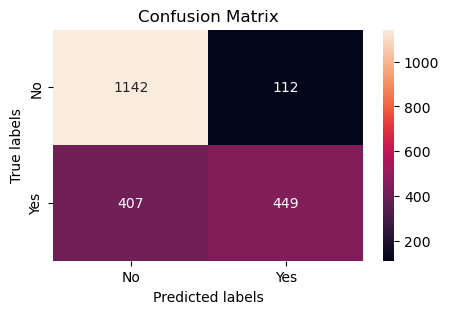

In [60]:
cm = confusion_matrix(y_pred_final, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [61]:
print(classification_report(y_pred_final, y_test, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.74      0.91      0.81      1254
         Yes       0.80      0.52      0.63       856

    accuracy                           0.75      2110
   macro avg       0.77      0.72      0.72      2110
weighted avg       0.76      0.75      0.74      2110

